<a href="https://colab.research.google.com/github/KunalDorik/Tamizan-Skills-Internship-ML-AI-PROJECT-4/blob/main/Project_4_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload Fake.csv and True.csv


Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


In [ ]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

df_fake['label'] = 0  # 0 = Fake
df_true['label'] = 1  # 1 = Real

df = pd.concat([df_fake, df_true], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # remove non-letters
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['text'] = df['title'] + ' ' + df['text']  # Combine title and text
df['text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
pac.fit(X_train_tfidf, y_train)
y_pred_pac = pac.predict(X_test_tfidf)


In [ ]:
svm = LinearSVC(random_state=42)
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)


Passive Aggressive Classifier Results:
Accuracy: 0.9932071269487751
F1 Score: 0.9928596511764017
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4710
           1       0.99      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



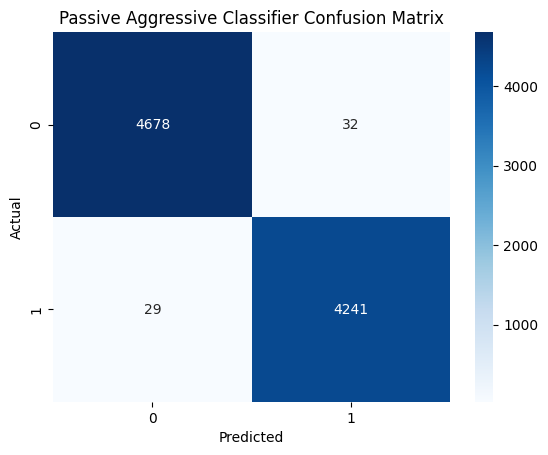

Linear SVM Results:
Accuracy: 0.9944320712694877
F1 Score: 0.9941506785212916
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4710
           1       0.99      1.00      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



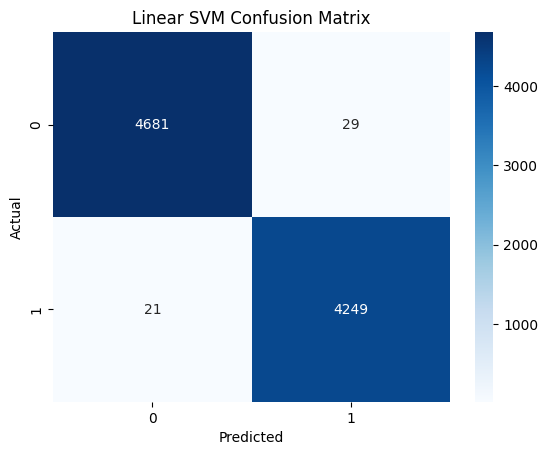

In [ ]:
def evaluate(y_true, y_pred, model_name):
    print(f"{model_name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluate(y_test, y_pred_pac, "Passive Aggressive Classifier")
evaluate(y_test, y_pred_svm, "Linear SVM")


In [ ]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    vect = tfidf.transform([cleaned])
    pred = pac.predict(vect)[0]
    return "Real" if pred == 1 else "Fake"

# Example usage:
print(predict_news("Breaking: Scientists discover water on Mars!"))


Fake
